<a href="https://colab.research.google.com/github/axrd/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/%5BRevised%5D_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [2]:
# TODO
import pandas as pd

# Loading and assigning column names:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data')
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df.shape
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
# UCI lists missing values as follows:
    # A1:  12
    # A2:  12
    # A4:   6
    # A5:   6
    # A6:   9
    # A7:   9
    # A14: 13
    
# Going by columns we can find missing values and how they're written:
#df.A14.value_counts()

# They're all labeled as '?'. In total 37 cases (~5%) of missing data across the df. 


In [0]:
# Since it's only 5% of the data, I dropped all the rows that had missing values for now.  
df = df[df != '?']


**ADJUSTMENT #1: ** *I thought I dropped the missing values. Instead, 
my method just replaced "?" with NaNs, causing problems down the road. I addressed that further below in Part 2.*

In [4]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

**Data Types: ** *Switched up data from Object to Floats*

In [0]:
# A2 and A14 are supposed to continous but have a dtype of object. Changing them to floats. 
df['A2'] = df.A2.astype(float)
df['A14'] = df.A14.astype(float)


In [6]:
df.A2.describe(), df.A14.describe()

(count    677.000000
 mean      31.569261
 std       11.966670
 min       13.750000
 25%       22.580000
 50%       28.420000
 75%       38.250000
 max       80.250000
 Name: A2, dtype: float64, count     676.000000
 mean      183.988166
 std       173.934087
 min         0.000000
 25%        74.500000
 50%       160.000000
 75%       277.000000
 max      2000.000000
 Name: A14, dtype: float64)

In [31]:
df.A16.describe()

count    689.000000
mean       0.444122
std        0.497229
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A16, dtype: float64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end. This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# Importing tools:
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

**ADJUSTMENT #2: ** *I originally used a facetgrid of histograms with the seaborn library. This made it difficult to visualize relationships among the different features against the A16 class. Using boxplots instead is way better because you can see the quartile ranges and infer a lot more because of it. Omitting outliers also helps normalize the visuals by using relevant scales instead of a general one across the board.*

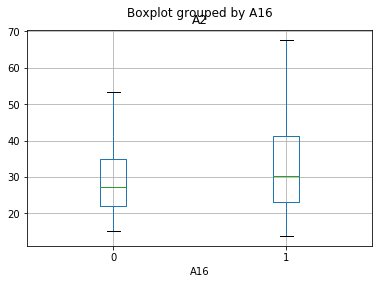

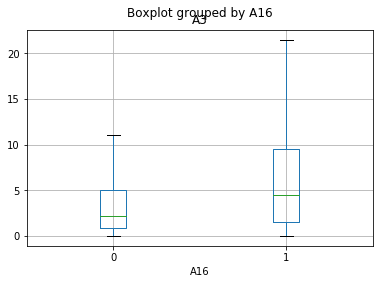

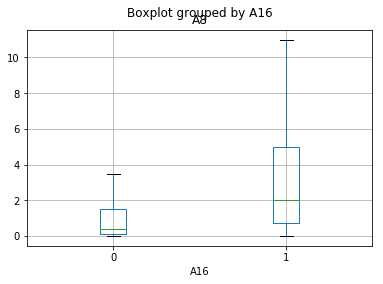

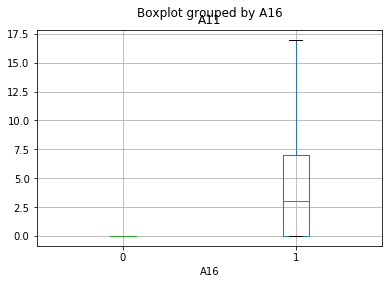

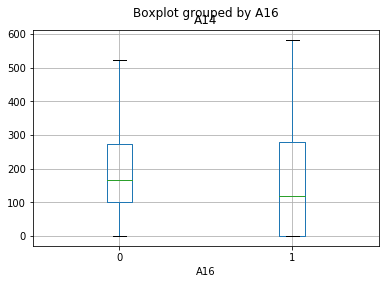

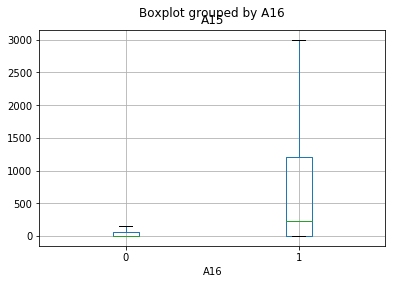

In [29]:
# Visualizing the continuous attributes against class (+,-) using Boxplots:
cols = ["A2", "A3", "A8", "A11", "A14", "A15"]

boxplots = [df.boxplot(column=col, by="A16", showfliers=False) for col in cols]



In [35]:
# Now that we get a sense of which attributes correlate with approval we can run some T-tests. Starting with A15:

# Splitting up DF into approved/not approved for convenience:
pos_df = df[df.A16 == 1]
neg_df = df[df.A16 == 0]

# Really different case (A15)
ttest_ind(pos_df.A15, neg_df.A15)

Ttest_indResult(statistic=4.69003486307862, pvalue=3.296216085672561e-06)

**ADJUSTMENT #1: ** *Here the NaN values made the T-test produce a NaN output, so I just omitted them directly instead of incorrectly handling them across the dataframe like I originally did.*

In [38]:
# Less obvious case (A14)
ttest_ind(pos_df.A14, neg_df.A14, nan_policy='omit')

Ttest_indResult(statistic=-2.6408733636831654, pvalue=0.008460849261398617)

In [39]:
# Going to use one-way Chi Square for categorical features:
from scipy.stats import chisquare 

categorical_feats = [df.A1, df.A4, df.A5, df.A6, df.A7, df.A9, df.A10, df.A12, df.A13]

crosstabs = [pd.crosstab(df.A16, feat) for feat in categorical_feats]

for crosstab in crosstabs:
  print(crosstab)
  print(chisquare(crosstab,axis=None))
  print("\n\n")

A1     a    b
A16          
0    112  262
1     98  205
Power_divergenceResult(statistic=107.73855243722305, pvalue=3.3649030043717534e-23)



A4   l    u    y
A16             
0    0  263  118
1    2  255   45
Power_divergenceResult(statistic=636.0073206442169, pvalue=3.3482971675913735e-135)



A5     g  gg    p
A16              
0    263   0  118
1    255   2   45
Power_divergenceResult(statistic=636.0073206442169, pvalue=3.3482971675913735e-135)



A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
0    35  75  12  23  11  46  45  7  37  22  27  1  31   6
1    19  62  29   7  14   7  14  3  14  16  51  2  32  32
Power_divergenceResult(statistic=393.22352941176473, pvalue=1.196603255204163e-66)



A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
0    34   4  49  51  5  2  1  230  2
1    25   2   8  87  3  2  1  168  6
Power_divergenceResult(statistic=1851.7529411764706, pvalue=0.0)



A9     f 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

For the **Continuous** features, I analyzed the relationship between A14 and A15 with getting approved (A16) using a T-Test. I chose these after visualizing them with boxplots and gauging their relationship. 

Upon closer inspection, A14 has a t-test statistic of -2.64 and a p-value of 0.0085. Clearly, it's statistically significant. A14 has a negative relationship with approval as evidenced by its negative statistic. If an applicant has more of whatever A14 measures, they're actually less likely to be approved. 

A15 on the other hand has a positive relationships. It's more likely that someone approved would have more of whatever A15 measures. It has a really small p-value of 0.0000033 and a positive statistic of 2.64.

For the **Categorical** features, I analyzed the relationship between all of them (A1, A4, A5, A6, A7, A9, A10, A12, A13) and getting approved (A16) using a looping one-way Chi Squared Test. Chose A9 and A13 because they had small number of features. 

A9 has a really hjgh test statistic (>357) and suggests some sort of relationship between it's categorical features and the approval for credit (A16). Namely, the attribute 'f' in A9 appears far more often in cases where applicants were not approved, and the attribute 't' appears  far more often in cases where applicants were approved. 

A13 has an extreme statistic (>1035), probably in part because it has an attribute 'p' with barely any instances. However, the attribute 'S' appears to have a really different distribution between approved and not approved (roughly 3x more likely to be not approved).

